In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import jaccard_score
import os
from sklearn.svm import l1_min_c
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score as cvs
import sys
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from tabulate import tabulate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [2]:
#os.chdir(os.pardir)
np.set_printoptions(threshold=sys.maxsize)

In [3]:
k_mer = "2"
pca_check = False

In [4]:
Windows = True

if Windows:
    path = "processed_data\combined_data\split_with_background\\"+k_mer + "mers_extend200\\"
else:
    path = "processed_data/combined_data/split_with_background/"+k_mer+"mers_extend200/"

meth_even = pd.read_csv(path + "combined_" + k_mer + "mers_meth_even_with_background.tsv", sep="\t")
meth_odd = pd.read_csv(path +"combined_"+k_mer+"mers_meth_odd_with_background.tsv", sep="\t")
unmeth_even = pd.read_csv(path + "combined_"+k_mer+"mers_unmeth_even_with_background.tsv", sep="\t")
unmeth_odd = pd.read_csv(path + "combined_"+k_mer+"mers_unmeth_odd_with_background.tsv", sep="\t")


meth_even_healthy = meth_even.loc[meth_even["cancer"]=="Healthy"]

meth_even_unhealthy = meth_even.loc[meth_even["cancer"]!="Healthy"]

meth_odd_healthy = meth_odd.loc[meth_odd["cancer"]=="Healthy"]

meth_odd_unhealthy = meth_odd.loc[meth_odd["cancer"]!="Healthy"]

unmeth_even_healthy = unmeth_even.loc[unmeth_even["cancer"]=="Healthy"]

unmeth_even_unhealthy = unmeth_even.loc[unmeth_even["cancer"]!="Healthy"]

unmeth_odd_healthy = unmeth_odd.loc[unmeth_odd["cancer"]=="Healthy"]

unmeth_odd_unhealthy = unmeth_odd.loc[unmeth_odd["cancer"]!="Healthy"]

meth_even_healthy = meth_even_healthy.drop(306)

meth_odd_healthy = meth_odd_healthy.drop(306)

unmeth_even_healthy = unmeth_even_healthy.drop(306)

unmeth_odd_healthy = unmeth_odd_healthy.drop(306)




#index to get get half the healthy 
tr = np.shape(meth_odd_healthy)[0]//2

# Training data 

tr_meth_even_healthy = meth_even_healthy[0:tr]

tr_meth_odd_healthy = meth_odd_healthy[0:tr]

tr_unmeth_even_healthy = unmeth_even_healthy[0:tr]

tr_unmeth_odd_healthy = unmeth_odd_healthy[0:tr]

# Test data 

test_meth_even_healthy = meth_even_healthy[tr:]

test_meth_odd_healthy = meth_odd_healthy[tr:]

test_unmeth_even_healthy = unmeth_even_healthy[tr:]

test_unmeth_odd_healthy = unmeth_odd_healthy[tr:]


# Matrices

train_matrix = [tr_meth_even_healthy, tr_meth_odd_healthy, tr_unmeth_even_healthy, tr_unmeth_odd_healthy]

pred_matrix = [test_meth_odd_healthy, test_meth_even_healthy, test_unmeth_even_healthy, test_unmeth_odd_healthy, meth_even_unhealthy, meth_odd_unhealthy, unmeth_even_unhealthy, unmeth_odd_unhealthy]

train_matrix = pd.concat(train_matrix) 
train_matrix = train_matrix.iloc[: , :-1]

pred_matrix = pd.concat(pred_matrix) 
pred_matrix = pred_matrix.iloc[: , :-1]



train_targets = [0] * np.shape(tr_meth_even_healthy)[0] + [0] * np.shape(tr_meth_odd_healthy)[0] +  [1] * np.shape(tr_unmeth_even_healthy)[0] + [1] * np.shape(tr_unmeth_odd_healthy)[0] 

pred_targets = [0] * np.shape(test_meth_even_healthy)[0] + [0] * np.shape(test_meth_odd_healthy)[0] +  [1] * np.shape(test_unmeth_even_healthy)[0] + [1] * np.shape(test_unmeth_odd_healthy)[0] + [0] * np.shape(meth_even_unhealthy)[0] +   [0] * np.shape(meth_odd_unhealthy)[0] +  [1] * np.shape(unmeth_even_unhealthy)[0] +  [1] * np.shape(unmeth_odd_unhealthy)[0]


In [5]:
if pca_check == False:
    labels = []
    for i in range(len(meth_even.columns)-1):
        labels.append(meth_even.columns[i])
else:
    labels = list(range(16))
    #labels = labels[::-1]

In [6]:
def pca(train_data, test_data): 
    dim_reduction = PCA()
    train_fit = dim_reduction.fit_transform(train_data)
    test_fit = dim_reduction.transform(test_data)
    return [train_fit, test_fit]



In [7]:
np.logspace(0,0,16)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
labels

['AA',
 'AC',
 'AG',
 'AT',
 'CA',
 'CC',
 'CG',
 'CT',
 'GA',
 'GC',
 'GG',
 'GT',
 'TA',
 'TC',
 'TG',
 'TT']

previous score is: 0
score is: 0.49929328621908126
previous score is: 0.49929328621908126
score is: 0.7520637546049169
previous score is: 0.7520637546049169
score is: 0.766919780467634
previous score is: 0.766919780467634
score is: 0.7994937723980653
previous score is: 0.7994937723980653
score is: 0.8398591584592637
previous score is: 0.8398591584592637
score is: 0.8788336716537604
previous score is: 0.8788336716537604
score is: 0.91070345588051
previous score is: 0.91070345588051
score is: 0.9220334310703457
previous score is: 0.9220334310703457
score is: 0.9404556048417414
previous score is: 0.9404556048417414
score is: 0.9461193393980404
previous score is: 0.9461193393980404
score is: 0.9517905921860512
previous score is: 0.9517905921860512
score is: 0.953915745683282
previous score is: 0.953915745683282
score is: 0.954624965541438
previous score is: 0.954624965541438
score is: 0.9560408991805127
previous score is: 0.9560408991805127
score is: 0.9602937122522116
previous score is: 0

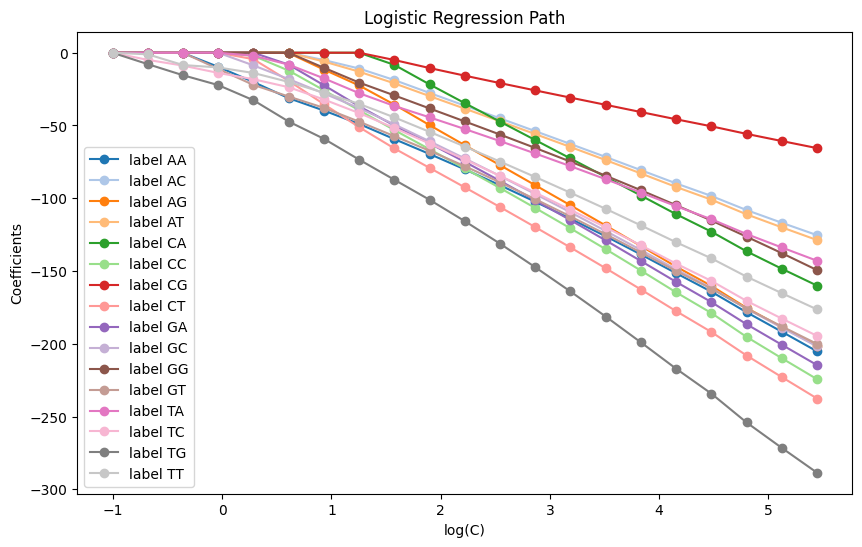

In [32]:
if pca_check == True:
    train_fit, test_fit = pca(train_matrix, pred_matrix)
else:
    train_fit, test_fit = train_matrix, pred_matrix

cs = l1_min_c(train_fit, train_targets, loss = 'log') * np.logspace(0,10,32)

empty_model = LR(penalty = 'l1',solver='liblinear',tol=1e-6,max_iter=1000000,warm_start=True,intercept_scaling=10000.0)
#empty_model = LogisticRegressionCV(penalty = 'l1',solver='liblinear',tol=1e-6,max_iter=1000,intercept_scaling=10000.0)

coefs_ = []
previous_score = 0
all_scores = []
for c in cs:
    empty_model.set_params(C=c)
    empty_model.fit(train_fit, train_targets)
    preds = empty_model.predict_proba(test_fit)
    score = cvs(empty_model, preds, pred_targets)
    score = score.mean()
    all_scores.append(score)
    print(f'previous score is: {previous_score}')
    print(f'score is: {score}')
    if previous_score > score:
        break
    coefs_.append(empty_model.coef_.ravel().copy())
    previous_score = score
            

coefs_ = np.array(coefs_)

#coefs_ = []
#empty_model.set_params(Cs=cs)
#empty_model.fit(train_fit, train_targets)
#coefs_.append(empty_model.coef_.ravel().copy())
#coefs_ = np.array(coefs_)

preds = empty_model.predict_proba(test_fit)

#cv_results = cross_validate(empty_model,train_matrix,pred_matrix)


score = cvs(empty_model, preds, pred_targets)
print(score.mean())

#labels = list(range(16))
#labels = labels[::-1]


colormap = plt.cm.get_cmap('tab20')

plt.figure(figsize=(10, 6))

if pca_check == True:
    for i, label in zip(range(len(labels)), labels):
        plt.plot(np.log10(cs[0:len(coefs_)]), coefs_[:, i], marker="o", label=f"Principal component {label}", color=colormap(i))
else:
    for i, label in zip(range(len(labels)), labels):
        plt.plot(np.log10(cs[0:len(coefs_)]), coefs_[:, i], marker="o", label=f"label {label}", color=colormap(i))

ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.legend()
plt.show()


In [19]:
all_scores

[0.49929328621908126,
 0.7520637546049169,
 0.766919780467634,
 0.7994937723980653,
 0.8398591584592637,
 0.8788336716537604,
 0.91070345588051,
 0.9220334310703457,
 0.9404556048417414,
 0.9468260531789591,
 0.9517905921860512,
 0.953915745683282,
 0.9567501190386688,
 0.9567501190386688,
 0.9581685587549809,
 0.9588752725358995,
 0.9595844923940555,
 0.9617096458912864,
 0.9602912061749743,
 0.9588752725358995,
 0.9624188657494426,
 0.9617096458912864,
 0.9624188657494426,
 0.9610004260331303,
 0.9595844923940555,
 0.9602912061749743,
 0.9595844923940555,
 0.9617096458912864,
 0.9602912061749743,
 0.9617096458912864,
 0.9617096458912864,
 0.9617096458912864,
 0.49929328621908126,
 0.7520637546049169,
 0.766919780467634,
 0.7994937723980653,
 0.8398591584592637,
 0.8788336716537604,
 0.91070345588051,
 0.9220334310703457,
 0.9404556048417414,
 0.9468260531789591,
 0.9517905921860512]

In [33]:
coefs_[-1]

array([-205.22292161, -125.37584291, -201.40362346, -128.73167473,
       -160.05315168, -224.34170329,  -65.55775888, -237.62799111,
       -214.66112696, -201.84607334, -149.3864274 , -200.12602681,
       -142.9728691 , -194.59633674, -288.63121323, -176.40496553])

In [118]:
cv_results = cross_validate(empty_model,test_fit,pred_targets)

In [119]:
cv_results['test_score']

array([1.        , 0.99646643, 0.9893617 , 0.9964539 , 0.9787234 ])

In [115]:
print(len(coefs_ [0]))

484


Text(0, 0.5, 'True positive rate')

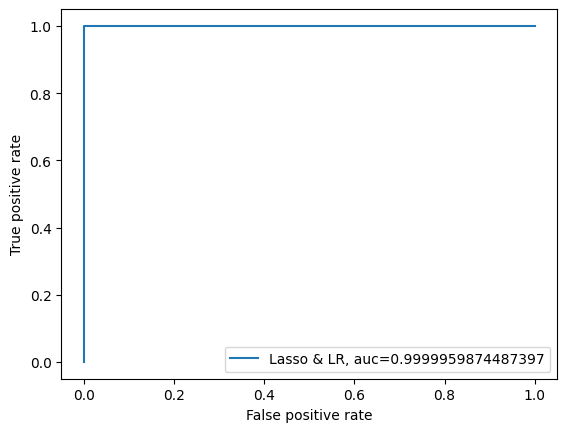

In [116]:
roc_score= roc_auc_score(pred_targets, preds[:, 1])

fpr, tpr, _ = metrics.roc_curve(pred_targets,  preds[:, 1])

ROC = [[fpr,tpr],roc_score]
results.append(ROC)
plt.plot(fpr,tpr,label="Lasso & LR, auc="+str(roc_score))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [117]:
table_data = [["2-mer PCA", results[0][1]],
              ["2-mer norm", results[1][1]],
              ["4-mer PCA", results[2][1]],
              ["4-mer norm", results[3][1]],
              ["6-mer PCA", results[4][1]],
              ["6-mer norm", results[5][1]]]
col_names = ["K-mer","ROC score"]
print(tabulate(table_data,headers=col_names))

IndexError: list index out of range

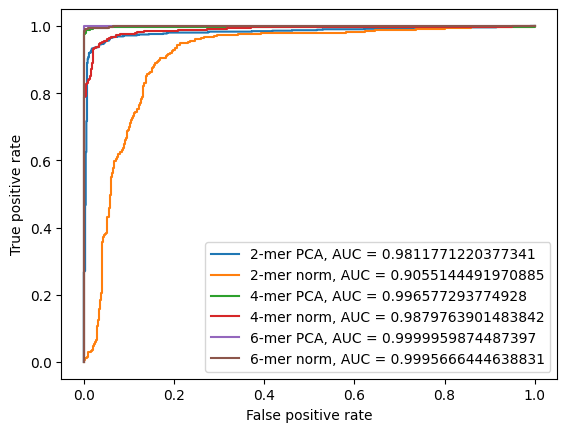

In [ ]:
for i in range(len(results)):
    plt.plot(results[i][0][0],results[i][0][1],label=table_data[i][0] + ", AUC = " + str(table_data[i][1]))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.savefig("ROC_curves")

In [ ]:
#results = []